## primo caso

A0, B0, +1,+1

In [18]:
import os
from IPython.display import display
import numpy as np
import matplotlib
import pandas as pd

In [19]:
# Compute the coincidences based on the data
def compute_coincidences(df):
  time_tags = df['Time']
  channels = df['Channel']
  delta_t = (time_tags - time_tags.shift()) * np.sign(channels - channels.shift())
  delta_t = delta_t[(delta_t != 0) & (delta_t > -7e-9) & (delta_t < 7e-9)]
  return delta_t

In [20]:
# Gaussian "custom" function
def gaussian(x, amplitude, mu, sigma):
  return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Fit a Gaussian function to the data
def fit_gaussian(x_data, y_data):
  mean = np.sum(x_data * y_data) / np.sum(y_data)
  std = np.sqrt(np.sum(y_data * (x_data - mean)**2) / np.sum(y_data))
  p0 = [np.sum(y_data), mean, std]
  params, _ = curve_fit(gaussian, x_data, y_data, p0=p0)
  return params

In [21]:
count=[]
means=[]
sigmas=[]

In [22]:
df = pd.read_csv("x0a0y0b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [842]:
print(coincidences)
print(params)

9226
[ 2.53359049e+03 -5.32797006e-09  3.82459288e-10]


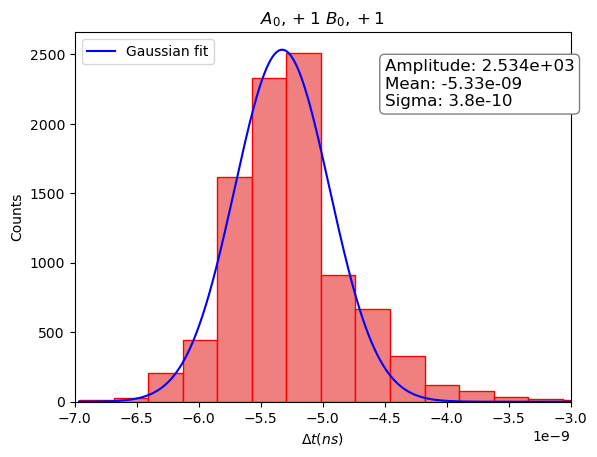

In [844]:
plt.hist(delta_t, bins=50, density=False, edgecolor='red', stacked=True,color='lightcoral')

plt.xlabel(r'$\Delta t (ns) $')
plt.ylabel('Counts')
plt.title(r'$A_{0}, +1 \ B_{0},+1$')
x = np.linspace(np.min(delta_t), np.max(delta_t), 10000)
y = gaussian(x, *params)
plt.plot(x, y, 'b-', label='Gaussian fit')
plt.xlim(-7e-9, -3e-9)
text = f"Amplitude: {params[0]:.3e}\nMean: {params[1]:.2e}\nSigma: {params[2]:.1e}"
plt.text(-4.5e-9, 0.8 * plt.ylim()[1], text, fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))


plt.legend(loc="upper left")

In [756]:
df = pd.read_csv("x0a1y0b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

9931
[ 2.44554674e+03 -5.38483485e-09  4.32487225e-10]


In [757]:
df = pd.read_csv("x0a1y0b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

2112
[ 5.10717557e+02 -5.35236049e-09  4.41229061e-10]


In [758]:
df = pd.read_csv("x0a0y0b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

2400
[ 6.47461789e+02 -5.38254997e-09  3.66944812e-10]


In [759]:
df = pd.read_csv("x1a0y0b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

10360
[ 2.78219498e+03 -5.36692793e-09  3.93648654e-10]


In [765]:
df = pd.read_csv("x1a1y0b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

10194
[ 2.48627530e+03 -5.37686263e-09  4.42278942e-10]


In [771]:
df = pd.read_csv("x1a1y0b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

1898
[ 5.29808508e+02 -5.35520830e-09  3.73455704e-10]


In [772]:
df = pd.read_csv("x1a0y0b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

2395
[ 5.75525627e+02 -5.37850302e-09  4.47754078e-10]


In [773]:
df = pd.read_csv("x0a0y1b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

10760
[ 2.67557320e+03 -5.37630760e-09  4.30109531e-10]


In [774]:
df = pd.read_csv("x0a1y1b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

10795
[ 2.90361561e+03 -5.39377874e-09  3.93815896e-10]


In [775]:
df = pd.read_csv("x0a1y1b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

1611
[ 4.31803396e+02 -5.36541423e-09  3.92706460e-10]


In [777]:
df = pd.read_csv("x0a0y1b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

1811
[ 4.77844310e+02 -5.40313361e-09  3.95833388e-10]


In [778]:
df = pd.read_csv("x1a0y1b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

2812
[ 7.72921865e+02 -5.36962870e-09  3.83315690e-10]


In [780]:
df = pd.read_csv("x1a1y1b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

2478
[ 6.11658571e+02 -5.36862138e-09  4.19970597e-10]


In [781]:
df = pd.read_csv("x1a1y1b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

9354
[ 2.52200678e+03 -5.39257945e-09  3.89441009e-10]


In [782]:
df = pd.read_csv("x1a0y1b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= params[1] - 4*params[2]) & (delta_t <= params[1] + 4*params[2])])
count.append(coincidences)
means.append(params[1])
sigmas.append(params[2])
print(coincidences)
print(params)

9753
[ 2.63750425e+03 -5.39985023e-09  3.90484452e-10]


In [783]:
means=np.mean(np.array(means))
print(means)

-5.374784744917528e-09


In [784]:
sigmas=np.mean(np.array(sigmas))
print(sigmas)

4.0773810036132495e-10


In [785]:
count=[]

In [786]:
df = pd.read_csv("x0a0y0b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

9230
[ 2.53359049e+03 -5.32797006e-09  3.82459288e-10]


In [787]:
df = pd.read_csv("x0a1y0b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

9906
[ 2.44554674e+03 -5.38483485e-09  4.32487225e-10]


In [788]:
df = pd.read_csv("x0a1y0b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

2100
[ 5.10717557e+02 -5.35236049e-09  4.41229061e-10]


In [789]:
df = pd.read_csv("x0a0y0b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

2408
[ 6.47461789e+02 -5.38254997e-09  3.66944812e-10]


In [790]:
df = pd.read_csv("x1a0y0b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

10367
[ 2.78219498e+03 -5.36692793e-09  3.93648654e-10]


In [791]:
df = pd.read_csv("x1a1y0b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

10176
[ 2.48627530e+03 -5.37686263e-09  4.42278942e-10]


In [792]:
df = pd.read_csv("x1a1y0b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

1905
[ 5.29808508e+02 -5.35520830e-09  3.73455704e-10]


In [793]:
df = pd.read_csv("x1a0y0b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

2386
[ 5.75525627e+02 -5.37850302e-09  4.47754078e-10]


In [794]:
df = pd.read_csv("x0a0y1b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

10739
[ 2.67557320e+03 -5.37630760e-09  4.30109531e-10]


In [795]:
df = pd.read_csv("x0a1y1b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

10812
[ 2.90361561e+03 -5.39377874e-09  3.93815896e-10]


In [796]:
df = pd.read_csv("x0a1y1b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

1612
[ 4.31803396e+02 -5.36541423e-09  3.92706460e-10]


In [797]:
df = pd.read_csv("x0a0y1b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

1812
[ 4.77844310e+02 -5.40313361e-09  3.95833388e-10]


In [798]:
df = pd.read_csv("x1a0y1b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

2821
[ 7.72921865e+02 -5.36962870e-09  3.83315690e-10]


In [799]:
df = pd.read_csv("x1a1y1b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

2471
[ 6.11658571e+02 -5.36862138e-09  4.19970597e-10]


In [800]:
df = pd.read_csv("x1a1y1b0.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

9381
[ 2.52200678e+03 -5.39257945e-09  3.89441009e-10]


In [801]:
df = pd.read_csv("x1a0y1b1.txt", delimiter=';', header=0)

  # Convert time tags to seconds
time_tag_unit = 81e-12 # rescaling factor in seconds
df['Time'] = df['Time'].apply(lambda x: x * time_tag_unit)

  # Filter the data to consider only the first second of acquisition
start_time = df['Time'][0]
end_time = start_time + 1
df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

delta_t = compute_coincidences(df)
counts, bins = np.histogram(delta_t, bins=50, density=False)
  # Compute the bin centers using the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
  # Pass the bin centers and counts to the fit_gaussian function
params = fit_gaussian(bin_centers, counts)
coincidences = len(delta_t[(delta_t >= means - 4*sigmas) & (delta_t <= means + 4*sigmas)])
count.append(coincidences)
#means.append(params[1])
#sigmas.append(params[2])
print(coincidences)
print(params)

9773
[ 2.63750425e+03 -5.39985023e-09  3.90484452e-10]


In [803]:
count

[9230,
 9906,
 2100,
 2408,
 10367,
 10176,
 1905,
 2386,
 10739,
 10812,
 1612,
 1812,
 2821,
 2471,
 9381,
 9773]

In [819]:
print(np.sqrt(count))

[ 96.072889    99.52889028  45.82575695  49.07137659 101.81846591
 100.8761617   43.64630569  48.84669897 103.62914648 103.98076745
  40.1497198   42.56759331  53.1130869   49.70915409  96.85556257
  98.85848471]


In [827]:
count1=count[0:4]
for i in range(len(count1)):
    print(count1[i]/np.sum(count1))
print("""""")
e1=[]
for i in range(len(count1)):
    print((np.sqrt(count1[i])*np.sqrt(np.sum(count1[i!=i])))/pow(np.sum(count1),1.5))


0.3903738792082558
0.41896464219252244
0.08881745897479276
0.10184401962442903

0.002538751979337685
0.00263007774447142
0.001210957975516076
0.001296724348955606


In [833]:
2*(np.sqrt((count1[0]+count1[1])*(count1[2]+count1[3])))/(pow(np.sum(count1),1.5))

0.005109355303617672

In [828]:
count2=count[4:8]
for i in range(len(count1)):
    print(count2[i]/np.sum(count2))
print("""""")
for i in range(len(count1)):
    print((np.sqrt(count2[i])*np.sqrt(np.sum(count2[i!=i])))/pow(np.sum(count2),1.5))

0.4174518804864299
0.4097608117902875
0.07670935008456149
0.09607795763872111

0.0026490068623761976
0.0026244909724132937
0.0011355441495472887
0.001270842568820295


In [836]:
2*(np.sqrt((count2[0]+count2[1])*(count2[2]+count2[3])))/(pow(np.sum(count2),1.5))

0.004798120723043934

In [829]:
count3=count[8:12]
for i in range(len(count1)):
    print(count3[i]/np.sum(count3))
print("""""")
for i in range(len(count1)):
    print((np.sqrt(count3[i])*np.sqrt(np.sum(count3[i!=i])))/pow(np.sum(count3),1.5))

0.42998998998999
0.4329129129129129
0.06454454454454454
0.07255255255255255

0.0027208562472835736
0.0027300883036532313
0.0010541591787195926
0.00111764215105311


In [837]:
2*(np.sqrt((count3[0]+count2[1])*(count3[2]+count3[3])))/(pow(np.sum(count3),1.5))

0.004288126245155467

In [830]:
count4=count[12:16]
for i in range(len(count1)):
    print(count4[i]/np.sum(count4))
print("""""")
for i in range(len(count1)):
    print((np.sqrt(count4[i])*np.sqrt(np.sum(count4[i!=i])))/pow(np.sum(count4),1.5))

0.1153972019962366
0.10107993127710055
0.38374376176061525
0.3997791049660476

0.0007380595005931318
0.0006907584473371794
0.0013459049795468358
0.0013737375874157533


In [838]:
2*(np.sqrt((count4[0]+count4[1])*(count4[2]+count4[3])))/(pow(np.sum(count4),1.5))

0.005268147715808159

In [839]:
np.sqrt(3*0.005**2+0.004**2)

0.009539392014169456

In [76]:
import csv
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

dataa = []

with open('Waveplate_A.csv', 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        dataa.append(row)

dfa = pd.DataFrame(dataa)
print(dfa)


      0      1
0     0   6780
1    15  41000
2    30  74000
3    45  71000
4    60  37000
5    75   4930
6    90   6041
7   105  39000
8   120  72000
9   135  71000
10  150  37000


In [77]:
datab = []

with open('Waveplate_B.csv', 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        datab.append(row)

dfb = pd.DataFrame(datab)
print(dfb)

      0      1
0     0  77000
1    15  76000
2    30  37600
3    45   5030
4    60   6710
5    75  40000
6    90  77500
7   105  76000
8   120  36000
9   135   4600
10  150   6056


In [78]:
# Define the modfied Malus' law function
def mod_malus_law(theta, theta_0, I0, offset):
  return I0 * np.cos(np.deg2rad(2*(theta - theta_0)))**2 + offset

In [79]:
# Convert the HWPA data to numpy arrays
angles_a = np.array([int(row[0]) for row in dataa])
coincidences_a = np.array([int(row[1]) for row in dataa])

In [80]:
# Convert the HWPA data to numpy arrays
angles_b = np.array([int(row[0]) for row in datab])
coincidences_b = np.array([int(row[1]) for row in datab])

In [91]:
# Provide initial guesses for parameters for HWPA
initial_theta_0_a = angles_a[np.argmin(coincidences_a)]
initial_I0_a = np.max(coincidences_a) - np.min(coincidences_a)
initial_offset_a = np.min(coincidences_a)

# Provide initial guesses for parameters for HWPB
initial_theta_0_b = angles_b[np.argmin(coincidences_b)]
initial_I0_b = np.max(coincidences_b) - np.min(coincidences_b)
initial_offset_b = np.min(coincidences_b)

In [92]:
print(initial_theta_0_a )
print(initial_I0_a)
print(initial_offset_a )

print(initial_theta_0_b )
print(initial_I0_b)
print(initial_offset_b )

75
69070
4930
135
72900
4600


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


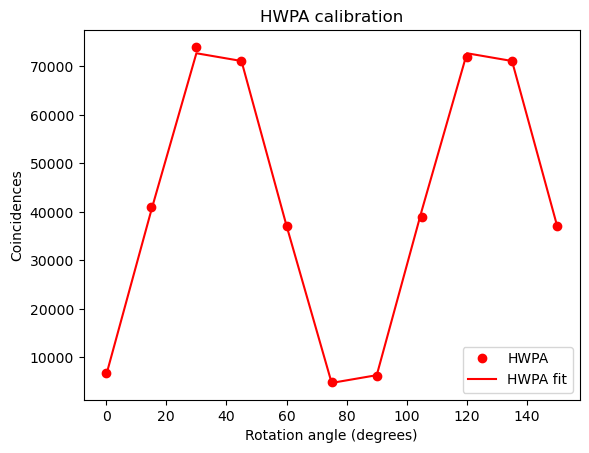

In [93]:
# Perform curve fitting for HWPA
params_a, _ = curve_fit(mod_malus_law, angles_a, coincidences_a, p0=[initial_theta_0_a, np.max(coincidences_a), initial_offset_a])
theta_0_a, I0_a, offset_a = params_a

# Plot the calibration results for HWPA
plt.figure()
plt.plot(angles_a, coincidences_a, 'ro', label='HWPA')
plt.plot(angles_a, mod_malus_law(angles_a, theta_0_a, I0_a, offset_a), 'r-', label='HWPA fit')
plt.xlabel('Rotation angle (degrees)')
plt.ylabel('Coincidences')
plt.legend()
plt.title('HWPA calibration')
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


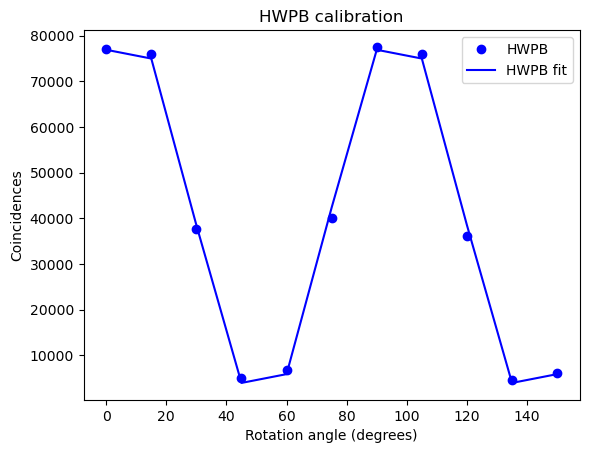

In [94]:
# Perform curve fitting for HWPB
params_b, _ = curve_fit(mod_malus_law, angles_b, coincidences_b, p0=[initial_theta_0_b, np.max(coincidences_b), initial_offset_b])
theta_0_b, I0_b, offset_b = params_b

# Plot the calibration results for HWPB
plt.figure()
plt.plot(angles_b, coincidences_b, 'bo', label='HWPB')
plt.plot(angles_b, mod_malus_law(angles_b, theta_0_b, I0_b, offset_b), 'b-', label='HWPB fit')
plt.xlabel('Rotation angle (degrees)')
plt.ylabel('Coincidences')
plt.legend()
plt.title('HWPB calibration')
plt.show()

In [95]:
# Print the fitted values of theta_0
print("θ_A =", round(theta_0_a, 2), "degrees")
print("θ_B =", round(theta_0_b, 2), "degrees")

θ_A = 81.9 degrees
θ_B = 141.83 degrees


In [ ]:
75
69070
4930
135
72900
4600

In [23]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Define the modified Malus law
def mod_malus_law(theta, theta_0, I0, offset):
    return I0 * np.cos(np.deg2rad(2 * (theta - theta_0)))**2 + offset

# Define the objective function for optimization
def objective_function(params, data):
    theta = data['Angle']
    counts = data['Counts']
    return np.sum((mod_malus_law(theta, *params) - counts)**2)

# Load the data from the CSV files
data_A = pd.read_csv('Waveplate_A.csv')
data_B = pd.read_csv('Waveplate_B.csv')

# Perform optimization for Waveplate A
result_A = minimize(objective_function, [75, 69070,4930], args=(data_A,))
optimized_angles_A = result_A.x

# Perform optimization for Waveplate B
result_B = minimize(objective_function, [135, 72900, 4600], args=(data_B,))
optimized_angles_B = result_B.x

print("Optimized Rotational Angles for Waveplate A:", optimized_angles_A)
print("Optimized Rotational Angles for Waveplate B:", optimized_angles_B)


Optimized Rotational Angles for Waveplate A: [3.69031082e+01 7.67197728e+04 3.45590345e+02]
Optimized Rotational Angles for Waveplate B: [   96.82844119 82104.02062954  -650.20049315]


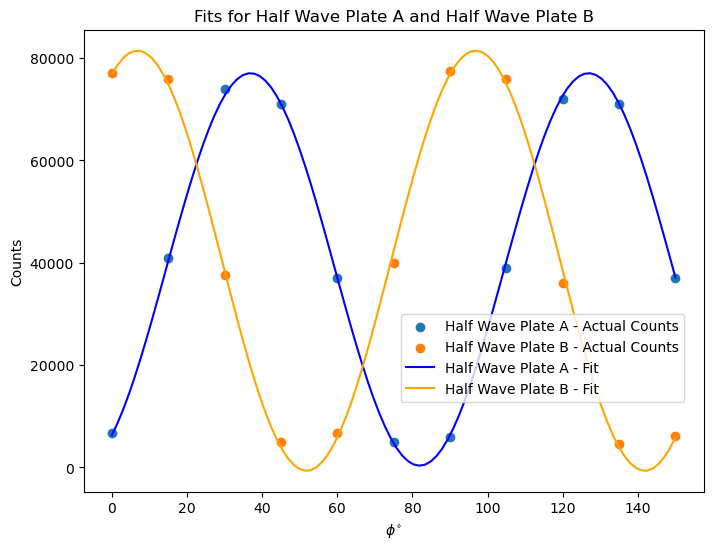

Optimized Rotational Angles for Waveplate A: [3.69031082e+01 7.67197728e+04 3.45590345e+02]
Optimized Rotational Angles for Waveplate B: [   96.82844119 82104.02062954  -650.20049315]


In [24]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the modified Malus law
def mod_malus_law(theta, theta_0, I0, offset):
    return I0 * np.cos(np.deg2rad(2* (theta - theta_0)))**2 + offset

# Define the objective function for optimization
def objective_function(params, data):
    theta = data['Angle']
    counts = data['Counts']
    return np.sum((mod_malus_law(theta, *params) - counts)**2)

# Load the data from the CSV files
data_A = pd.read_csv('Waveplate_A.csv')
data_B = pd.read_csv('Waveplate_B.csv')

# Perform optimization for Waveplate A
result_A = minimize(objective_function, [75, 69070,4930], args=(data_A,))
optimized_angles_A = result_A.x

# Perform optimization for Waveplate B
result_B = minimize(objective_function, [135, 72900, 4600], args=(data_B,))
optimized_angles_B = result_B.x

# Generate angles for plotting the fit
theta_range = np.linspace(min(data_A['Angle']), max(data_A['Angle']), 100)

# Calculate predicted counts for Waveplate A
predicted_counts_A = mod_malus_law(theta_range, *optimized_angles_A)

# Calculate predicted counts for Waveplate B
predicted_counts_B = mod_malus_law(theta_range, *optimized_angles_B)

# Plot the fits for both Waveplate A and Waveplate B on the same plot
plt.figure(figsize=(8, 6))
plt.scatter(data_A['Angle'], data_A['Counts'], label='Half Wave Plate A - Actual Counts')
plt.scatter(data_B['Angle'], data_B['Counts'], label='Half Wave Plate B - Actual Counts')
plt.plot(theta_range, predicted_counts_A, color='blue', label='Half Wave Plate A - Fit')
plt.plot(theta_range, predicted_counts_B, color='orange', label='Half Wave Plate B - Fit')
plt.xlabel(r'$\phi^{\circ}$')
plt.ylabel('Counts')
plt.title('Fits for Half Wave Plate A and Half Wave Plate B')
plt.legend(loc="upper left", bbox_to_anchor=(0.5,0.4))

plt.show()


print("Optimized Rotational Angles for Waveplate A:", optimized_angles_A)
print("Optimized Rotational Angles for Waveplate B:", optimized_angles_B)

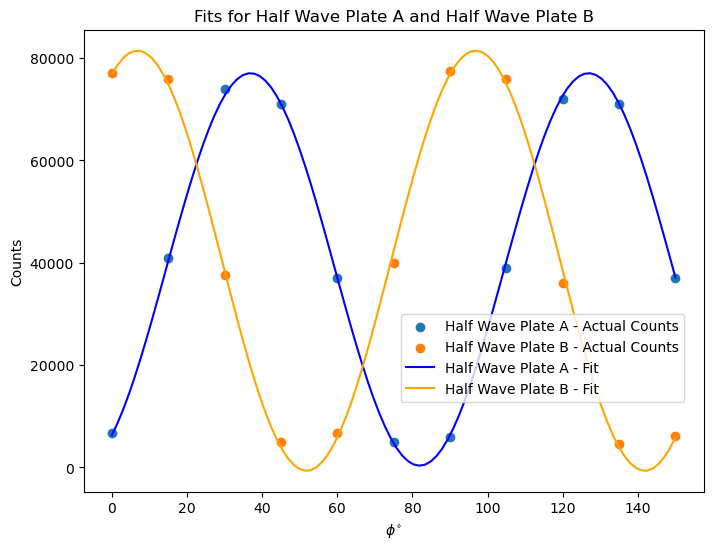

Optimized Rotational Angles for Waveplate A: [3.69031082e+01 7.67197728e+04 3.45590345e+02]
Errors in Rotational Angles for Waveplate A: [9.29577670e+03 3.67010772e+00 5.51890993e+00]
Optimized Rotational Angles for Waveplate B: [   96.82844119 82104.02062954  -650.20049315]
Errors in Rotational Angles for Waveplate B: [6098483.32236511 1464942.16540947 1464781.75301734]


In [28]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the modified Malus law
def mod_malus_law(theta, theta_0, I0, offset):
    return I0 * np.cos(np.deg2rad(2 * (theta - theta_0)))**2 + offset

# Define the objective function for optimization
def objective_function(params, data):
    theta = data['Angle']
    counts = data['Counts']
    return np.sum((mod_malus_law(theta, *params) - counts)**2)

# Load the data from the CSV files
data_A = pd.read_csv('Waveplate_A.csv')
data_B = pd.read_csv('Waveplate_B.csv')

# Perform optimization for Waveplate A
result_A = minimize(objective_function, [75, 69070, 4930], args=(data_A,))
optimized_angles_A = result_A.x
hess_inv_A = result_A.hess_inv

# Perform optimization for Waveplate B
result_B = minimize(objective_function, [135, 72900, 4600], args=(data_B,))
optimized_angles_B = result_B.x
hess_inv_B = result_B.hess_inv

# Generate angles for plotting the fit
theta_range = np.linspace(min(data_A['Angle']), max(data_A['Angle']), 100)

# Calculate predicted counts for Waveplate A
predicted_counts_A = mod_malus_law(theta_range, *optimized_angles_A)

# Calculate predicted counts for Waveplate B
predicted_counts_B = mod_malus_law(theta_range, *optimized_angles_B)

# Plot the fits for both Waveplate A and Waveplate B on the same plot
plt.figure(figsize=(8, 6))
plt.scatter(data_A['Angle'], data_A['Counts'], label='Half Wave Plate A - Actual Counts')
plt.scatter(data_B['Angle'], data_B['Counts'], label='Half Wave Plate B - Actual Counts')
plt.plot(theta_range, predicted_counts_A, color='blue', label='Half Wave Plate A - Fit')
plt.plot(theta_range, predicted_counts_B, color='orange', label='Half Wave Plate B - Fit')
plt.xlabel(r'$\phi^{\circ}$')
plt.ylabel('Counts')
plt.title('Fits for Half Wave Plate A and Half Wave Plate B')
plt.legend(loc="upper left", bbox_to_anchor=(0.5, 0.4))

plt.show()

# Calculate the errors in the fit parameters
cov_A = np.linalg.inv(hess_inv_A)
errors_A = np.sqrt(np.diag(cov_A))

cov_B = np.linalg.inv(hess_inv_B)
errors_B = np.sqrt(np.diag(cov_B))

print("Optimized Rotational Angles for Waveplate A:", optimized_angles_A)
print("Errors in Rotational Angles for Waveplate A:", errors_A)
print("Optimized Rotational Angles for Waveplate B:", optimized_angles_B)
print("Errors in Rotational Angles for Waveplate B:", errors_B)



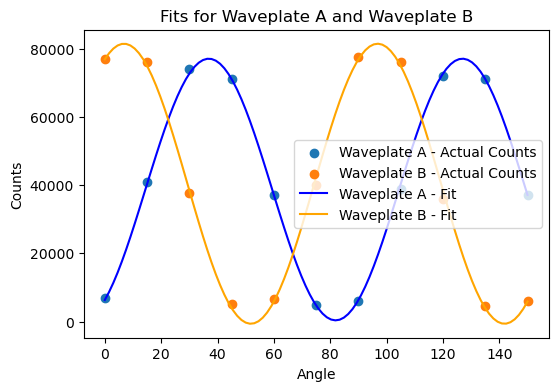

In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the modified Malus law
def mod_malus_law(theta, theta_0, I0, offset):
    return I0 * np.cos(np.deg2rad(2 * (theta - theta_0)))**2 + offset

# Define the objective function for optimization
def objective_function(params, data):
    theta = data['Angle']
    counts = data['Counts']
    return np.sum((mod_malus_law(theta, *params) - counts)**2)

# Load the data from the CSV files
data_A = pd.read_csv('Waveplate_A.csv')
data_B = pd.read_csv('Waveplate_B.csv')

# Perform optimization for Waveplate A
result_A = minimize(objective_function, [0.0, 1.0, 0.0], args=(data_A,))
optimized_angles_A = result_A.x

# Perform optimization for Waveplate B
result_B = minimize(objective_function, [0.0, 1.0, 0.0], args=(data_B,))
optimized_angles_B = result_B.x

# Generate angles for plotting the fit
theta_range = np.linspace(min(data_A['Angle']), max(data_A['Angle']), 100)

# Calculate predicted counts for Waveplate A
predicted_counts_A = mod_malus_law(theta_range, *optimized_angles_A)

# Calculate predicted counts for Waveplate B
predicted_counts_B = mod_malus_law(theta_range, *optimized_angles_B)

# Plot the fits for both Waveplate A and Waveplate B on the same plot
plt.figure(figsize=(6, 4))  # Adjusted figure size
plt.scatter(data_A['Angle'], data_A['Counts'], label='Waveplate A - Actual Counts')
plt.scatter(data_B['Angle'], data_B['Counts'], label='Waveplate B - Actual Counts')
plt.plot(theta_range, predicted_counts_A, color='blue', label='Waveplate A - Fit')
plt.plot(theta_range, predicted_counts_B, color='orange', label='Waveplate B - Fit')
plt.xlabel('Angle')
plt.ylabel('Counts')
plt.title('Fits for Waveplate A and Waveplate B')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the modified Malus law
def mod_malus_law(theta, theta_0, I0, offset):
    return I0 * np.cos(np.deg2rad(2 * (theta - theta_0)))**2 + offset

# Define the objective function for optimization
def objective_function(params, data):
    theta = data['Angle']
    counts = data['Counts']
    return np.sum((mod_malus_law(theta, *params) - counts)**2)

# Load the data from the CSV files
data_A = pd.read_csv('Waveplate_A.csv')
data_B = pd.read_csv('Waveplate_B.csv')

# Perform optimization for Waveplate A
result_A = minimize(objective_function, [0.0, 1.0, 0.0], args=(data_A,))
optimized_angles_A = result_A.x

# Perform optimization for Waveplate B
result_B = minimize(objective_function, [0.0, 1.0, 0.0], args=(data_B,))
optimized_angles_B = result_B.x

# Generate angles for plotting the fit
theta_range = np.linspace(min(data_A['Angle']), max(data_A['Angle']), 100)

# Calculate predicted counts for Waveplate A
predicted_counts_A = mod_malus_law(theta_range, *optimized_angles_A)

# Calculate predicted counts for Waveplate B
predicted_counts_B = mod_malus_law(theta_range, *optimized_angles_B)

# Plot the fits for both Waveplate A and Waveplate B on the same plot
plt.figure(figsize=(8, 6))
plt.scatter(data_A['Angle'], data_A['Counts'], label='Waveplate A - Actual Counts')
plt.scatter(data_B['Angle'], data_B['Counts'], label='Waveplate B - Actual Counts')
plt.plot(theta_range, predicted_counts_A, color='blue', label='Waveplate A - Fit')
plt.plot(theta_range, predicted_counts_B, color='orange', label='Waveplate B - Fit')
plt.xlabel('Angle')
plt.ylabel('Counts')
plt.title('Fits for Waveplate A and Waveplate B')
plt.legend()

plt.show()


In [260]:
from scipy.optimize import minimize
from scipy.linalg import sqrtm
from numpy.linalg import inv, eigvalsh
from numpy.random import poisson

In [30]:
df_qst = pd.read_csv("deco.txt", delimiter=';', header=0)
df_qst

,A,B,HWPa,QWPa,HWPb,QWPb,coinc_phi_p,coinc_phi_m,coinc_dec
0,H,H,37.0,47,7.0,270,5220,9000,16000
1,H,V,37.0,47,52.0,270,270,400,650
2,V,V,82.0,47,52.0,270,5300,9000,17000
3,V,H,82.0,47,7.0,270,314,550,1200
4,R,H,82.0,92,7.0,270,3400,5802,10671
5,R,V,82.0,92,52.0,270,2600,4437,8160
6,D,V,59.5,92,52.0,270,3200,5461,10043
7,D,H,59.5,92,7.0,270,3050,5205,9572
8,D,R,59.5,92,7.0,225,3300,5632,10357
9,D,D,59.5,92,29.5,225,300,8700,15000


In [262]:
# Drop the last measurement (not useful for the computation)
df_qst = df_qst.drop(16)

# Extract the relevant data for the coincidences
coinc_phi_p = df_qst[['coinc_phi_p']].values
coinc_phi_m = df_qst[['coinc_phi_m']].values
coinc_dec = df_qst[['coinc_dec']].values

# Print the coincidences vectors
print('Coincidences vector phi_m:')
print(coinc_phi_m.T)
print('Coincidences vector phi_p:')
print(coinc_phi_p.T)
print('Coincidences vector dec:')
print(coinc_dec.T)

Coincidences vector phi_m:
[[9000  400 9000  550 5802 4437 5461 5205 5632 8700 5461 4062 5973 4096
  5120 8500]]
Coincidences vector phi_p:
[[5220  270 5300  314 3400 2600 3200 3050 3300  300 3200 2380 3500 2400
  3000  320]]
Coincidences vector dec:
[[16000   650 17000  1200 10671  8160 10043  9572 10357 15000 10043  7470
  10985  7532  9416 15000]]


In [263]:
# Define coincidences and corresponding labels
#N_values = [coinc_phi_m, coinc_phi_p, coinc_dec]
#N_names = ["coinc_phi_m", "coinc_phi_p", "coinc_dec"]


# Define coincidences and corresponding labels
N_values = [ coinc_phi_p, coinc_dec]
N_names = [ "coinc_phi_p", "coinc_dec"]

In [264]:
# Define the waveplates configuration
waveplates_configuration = [[0, 0, 0, 0],
                            [0, 0, np.pi/4, 0],
                            [np.pi/4, 0, np.pi/4, 0],
                            [np.pi/4, 0, 0, 0],
                            [np.pi/4, np.pi/4, 0, 0],
                            [np.pi/4, np.pi/4, np.pi/4, 0],
                            [np.pi/8, np.pi/4, np.pi/4, 0],
                            [np.pi/8, np.pi/4, 0, 0],
                            [np.pi/8, np.pi/4, 0, -np.pi/4],
                            [np.pi/8, np.pi/4, np.pi/8, -np.pi/4],
                            [np.pi/4, np.pi/4, np.pi/8, -np.pi/4],
                            [0, 0, np.pi/8, -np.pi/4],
                            [np.pi/4, 0, np.pi/8, -np.pi/4],
                            [np.pi/4, 0, np.pi/4, -np.pi/4],
                            [0, 0, np.pi/4, -np.pi/4],
                            [np.pi/4, np.pi/4, np.pi/4, -np.pi/4]
                            ]

# Define gamma matrices (tensor product of Pauli matrices)
gamma_1 = 0.5 * np.array([[0, 1, 0, 0],
                          [1, 0, 0, 0],
                          [0, 0, 0, 1],
                          [0, 0, 1, 0]])

gamma_2 = 0.5 * np.array([[0, -1j, 0, 0],
                          [1j, 0, 0, 0],
                          [0, 0, 0, -1j],
                          [0, 0, 1j, 0]])

gamma_3 = 0.5 * np.array([[1, 0, 0, 0],
                          [0, -1, 0, 0],
                          [0, 0, 1, 0],
                          [0, 0, 0, -1]])

gamma_4 = 0.5 * np.array([[0, 0, 1, 0],
                          [0, 0, 0, 1],
                          [1, 0, 0, 0],
                          [0, 1, 0, 0]])

gamma_5 = 0.5 * np.array([[0, 0, 0, 1],
                          [0, 0, 1, 0],
                          [0, 1, 0, 0],
                          [1, 0, 0, 0]])

gamma_6 = 0.5 * np.array([[0, 0, 0, -1j],
                          [0, 0, 1j, 0],
                          [0, -1j, 0, 0],
                          [1j, 0, 0, 0]])

gamma_7 = 0.5 * np.array([[0, 0, 1, 0],
                          [0, 0, 0, -1],
                          [1, 0, 0, 0],
                          [0, -1, 0, 0]])

gamma_8 = 0.5 * np.array([[0, 0, -1j, 0],
                          [0, 0, 0, -1j],
                          [1j, 0, 0, 0],
                          [0, 1j, 0, 0]])

gamma_9 = 0.5 * np.array([[0, 0, 0, -1j],
                          [0, 0, -1j, 0],
                          [0, 1j, 0, 0],
                          [1j, 0, 0, 0]])

gamma_10 = 0.5 * np.array([[0, 0, 0, -1],
                           [0, 0, 1, 0],
                           [0, 1, 0, 0],
                           [-1, 0, 0, 0]])

gamma_11 = 0.5 * np.array([[0, 0, -1j, 0],
                           [0, 0, 0, 1j],
                           [1j, 0, 0, 0],
                           [0, -1j, 0, 0]])

gamma_12 = 0.5 * np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, -1, 0],
                           [0, 0, 0, -1]])

gamma_13 = 0.5 * np.array([[0, 1, 0, 0],
                           [1, 0, 0, 0],
                           [0, 0, 0, -1],
                           [0, 0, -1, 0]])

gamma_14 = 0.5 * np.array([[0, -1j, 0, 0],
                           [1j, 0, 0, 0],
                           [0, 0, 0, 1j],
                           [0, 0, -1j, 0]])

gamma_15 = 0.5 * np.array([[1, 0, 0, 0],
                           [0, -1, 0, 0],
                           [0, 0, -1, 0],
                           [0, 0, 0, 1]])

gamma_16 = 0.5 * np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]])

# Define the list of gamma matrices for the density matrix computation by linear inversion
gammas = [gamma_1, gamma_2, gamma_3, gamma_4, gamma_5, gamma_6, gamma_7, gamma_8, gamma_9, gamma_10, gamma_11, gamma_12, gamma_13, gamma_14, gamma_15, gamma_16]

In [265]:
# Computing psi states
def compute_psi(h_1, q_1, h_2, q_2):
  a_1 = (1 / np.sqrt(2)) * (np.sin(2 * h_1) - 1j * np.sin(2 * (h_1 - q_1)))
  b_1 = (-1 / np.sqrt(2)) * (np.cos(2 * h_1) + 1j * np.cos(2 * (h_1 - q_1)))
  a_2 = (1 / np.sqrt(2)) * (np.sin(2 * h_2) - 1j * np.sin(2 * (h_2 - q_2)))
  b_2 = (-1 / np.sqrt(2)) * (np.cos(2 * h_2) + 1j * np.cos(2 * (h_2 - q_2)))
  first_term = a_1 * a_2
  second_term = a_1 * b_2
  third_term = b_1 * a_2
  fourth_term = b_1 * b_2
  psi = first_term * np.array([1, 0, 0, 0]) + second_term * np.array([0, 1, 0, 0]) + third_term * np.array([0, 0, 1, 0]) + fourth_term * np.array([0, 0, 0, 1])
  return psi

# Define psi_states as a list containing all |psi_nu> states
psi_states = []
for angles in waveplates_configuration:
  h1, q1, h2, q2 = angles
  psi = compute_psi(h1, q1, h2, q2)
  psi_states.append(psi)

In [266]:
# Determine the density matrix by linear inversion
def compute_rho_lin_inv(N):
  # Compute B
  B = np.zeros((16, 16), dtype=complex)
  for i in range(16):
    for j in range(16):
      B[i, j] += np.dot(np.dot(np.conj(psi_states[i].T), gammas[j]), psi_states[i])
  # Compute the inverse of B
  B_inv = np.linalg.inv(B)
  # Compute the M matrices
  M = np.zeros((16, 4, 4), dtype=complex)
  for mu in range(16):
    for nu in range(16):
      M[mu] += np.dot(B_inv[nu, mu], gammas[nu])
  # Compute the density matrix rho
  rho = np.zeros((4, 4), dtype=complex)
  for i in range(16):
    rho += M[i] * N[i]
  rho /= np.sum(N[:4])
  return rho

In [267]:
# Define the function to check density matrix properties
def is_density_matrix(rho):
  # Check hermiticity
  rho_conj_transpose = np.conj(rho.T)
  is_hermitian = np.allclose(rho, rho_conj_transpose)
  # Check positivity
  eigenvalues = np.linalg.eigvalsh(rho)
  is_positive = np.all(eigenvalues >= 0)
  # Check Tr[rho] = 1
  trace = np.trace(rho)
  is_trace_one = np.allclose(trace, 1)
  return is_hermitian and is_positive and is_trace_one

In [268]:
rho_lin_inv_matrices = []

for N, N_name in zip(N_values, N_names):
  # Determine density matrix by linear inversion
  rho_lin_inv = compute_rho_lin_inv(N)
  # Check for physicality of the density matrix
  if is_density_matrix(rho_lin_inv):
    print(f"The density matrix for {N_name} is physical.")
  else:
    print(f"The density matrix for {N_name} is not physical.")
  rho_lin_inv_matrices.append(rho_lin_inv)
  print(rho_lin_inv)
  print()

The density matrix for coinc_phi_p is not physical.
[[ 0.47730548+0.j         -0.06240994+0.03665346j -0.03737392-0.01666066j
  -0.50369236-0.01215778j]
 [-0.06240994-0.03665346j  0.0282781 +0.j         -0.03467219+0.00567363j
  -0.02548631+0.05700648j]
 [-0.03737392+0.01666066j -0.03467219-0.00567363j  0.02431556+0.j
   0.03287104-0.0229647j ]
 [-0.50369236+0.01215778j -0.02548631-0.05700648j  0.03287104+0.0229647j
   0.47010086+0.j        ]]

The density matrix for coinc_dec is not physical.
[[ 0.48780488+0.j         -0.05408895+0.04499283j -0.03494978-0.01908178j
   0.3013056 -0.01215208j]
 [-0.05408895-0.04499283j  0.03443329+0.j         -0.03286944+0.00569584j
  -0.02789096+0.05942611j]
 [-0.03494978+0.01908178j -0.03286944-0.00569584j  0.01865136+0.j
   0.02453372-0.0313056j ]
 [ 0.3013056 +0.01215208j -0.02789096-0.05942611j  0.02453372+0.0313056j
   0.45911047+0.j        ]]



In [269]:
init=np.array([0.753081,6.40772j,0.1015038348894054,np.sqrt(0.45911),0.656771,0.0809718,-0.225211,1.39121,0.036208454225982054,0.04620289671470588,1.98475 ,2.64152 ,-0.04116281684514129,-0.0877039041233869, 0.444681259706206,0.017934622663669682])

In [422]:
np.sqrt(0.45911)

0.6775765639394562

In [411]:
# Define the matrix T(t)
def T(t):
  return np.array([[t[0], t[4] + 1j * t[5], t[6] + 1j * t[7], t[8] + 1j * t[9]],
                   [0, t[1], t[10] + 1j * t[11], t[12] + 1j * t[13]],
                   [0, 0, t[2], t[14] + 1j * t[15]],
                   [0, 0, 0, t[3]]])

# Define the function to compute rho_mle
def compute_rho_mle(t):
  T_dagger_T = np.dot(np.conj(T(t).T), T(t))
  rho_mle = T_dagger_T / np.trace(T_dagger_T)
  return rho_mle

# Define the function to compute the likelihood
def likelihood(t, N):
  rho_mle = compute_rho_mle(t)
  P = np.array([np.trace(np.dot(M, rho_mle)) for M in gammas])
  chi_sq = np.sum(np.abs(P - N) ** 2 / N)
  return chi_sq

# Define the function to find the optimum set of variables (MLE)
def optimize_variables(N):
  #initial_guess = np.random.randn(16) # initial guess for the variables
  initial_guess=init
  # Minimize the negative likelihood function
  result = minimize(lambda t: -likelihood(t, N), initial_guess, method='SLSQP')
  # Get the optimized variables
  t_opt = result.x
  return t_opt

In [412]:
rho_mle_matrices = []

for N, N_name in zip(N_values, N_names):
  # Perform Maximum-Likelihood estimation
  t_optimum = optimize_variables(N)
  rho_mle = compute_rho_mle(t_optimum)
  # Check for physicality of the MLE density matrix
  if is_density_matrix(rho_mle):
    print(f"The density matrix for {N_name} after Maximum-Likelihood estimation is physical.")
  else:
    print(f"The density matrix for {N_name} after Maximum-Likelihood estimation is not physical.")
  rho_mle_matrices.append(rho_mle)
  print(rho_mle)
  print()

The density matrix for coinc_phi_p after Maximum-Likelihood estimation is physical.
[[ 5.13519304e-02+0.j          2.56890694e-02-0.05081555j
  -7.72507011e-02+0.10226824j  4.27580941e-05+0.05122045j]
 [ 2.56890694e-02+0.05081555j  3.20206759e-01+0.j
  -3.97115479e-01-0.02486785j -5.08098728e-02+0.02600481j]
 [-7.72507011e-02-0.10226824j -3.97115479e-01+0.02486785j
   5.77350879e-01+0.j          1.02088520e-01-0.07747735j]
 [ 4.27580941e-05-0.05122045j -5.08098728e-02-0.02600481j
   1.02088520e-01+0.07747735j  5.10904308e-02+0.j        ]]

The density matrix for coinc_dec after Maximum-Likelihood estimation is physical.
[[ 5.00663142e-02+0.j          2.44498008e-02-0.05157049j
  -7.62614408e-02+0.09992044j -1.67606227e-04+0.04953591j]
 [ 2.44498008e-02+0.05157049j  3.30013192e-01+0.j
  -4.00257007e-01-0.03114893j -5.09798112e-02+0.0241293j ]
 [-7.62614408e-02-0.09992044j -4.00257007e-01+0.03114893j
   5.70908656e-01+0.j          9.89926563e-02-0.07522744j]
 [-1.67606227e-04-0.04953591j

In [413]:
t_optimum

array([ 4.19892414e+00, -9.65939443e+00,  1.96402659e-02,  3.98427715e-03,
        2.05053759e+00, -4.32507512e+00, -6.39583740e+00,  8.38005290e+00,
       -1.40566735e-02,  4.15444039e+00,  9.48218165e+00,  5.07589335e-02,
       -4.60034306e-03, -4.05260178e-03, -1.18466421e-03,  5.84745663e-04])

In [414]:
rho_mle

array([[ 5.00663142e-02+0.j        ,  2.44498008e-02-0.05157049j,
        -7.62614408e-02+0.09992044j, -1.67606227e-04+0.04953591j],
       [ 2.44498008e-02+0.05157049j,  3.30013192e-01+0.j        ,
        -4.00257007e-01-0.03114893j, -5.09798112e-02+0.0241293j ],
       [-7.62614408e-02-0.09992044j, -4.00257007e-01+0.03114893j,
         5.70908656e-01+0.j        ,  9.89926563e-02-0.07522744j],
       [-1.67606227e-04-0.04953591j, -5.09798112e-02-0.0241293j ,
         9.89926563e-02+0.07522744j,  4.90118379e-02+0.j        ]])

In [415]:
rho_lin_inv

array([[ 0.48780488+0.j        , -0.05408895+0.04499283j,
        -0.03494978-0.01908178j,  0.3013056 -0.01215208j],
       [-0.05408895-0.04499283j,  0.03443329+0.j        ,
        -0.03286944+0.00569584j, -0.02789096+0.05942611j],
       [-0.03494978+0.01908178j, -0.03286944-0.00569584j,
         0.01865136+0.j        ,  0.02453372-0.0313056j ],
       [ 0.3013056 +0.01215208j, -0.02789096-0.05942611j,
         0.02453372+0.0313056j ,  0.45911047+0.j        ]])

In [416]:
rho_mle_matrices=np.array([rho_lin_inv,rho_mle])
rho_mle_matrices

array([[[ 4.87804878e-01+0.j        , -5.40889527e-02+0.04499283j,
         -3.49497848e-02-0.01908178j,  3.01305595e-01-0.01215208j],
        [-5.40889527e-02-0.04499283j,  3.44332855e-02+0.j        ,
         -3.28694405e-02+0.00569584j, -2.78909613e-02+0.05942611j],
        [-3.49497848e-02+0.01908178j, -3.28694405e-02-0.00569584j,
          1.86513630e-02+0.j        ,  2.45337159e-02-0.0313056j ],
        [ 3.01305595e-01+0.01215208j, -2.78909613e-02-0.05942611j,
          2.45337159e-02+0.0313056j ,  4.59110473e-01+0.j        ]],

       [[ 5.00663142e-02+0.j        ,  2.44498008e-02-0.05157049j,
         -7.62614408e-02+0.09992044j, -1.67606227e-04+0.04953591j],
        [ 2.44498008e-02+0.05157049j,  3.30013192e-01+0.j        ,
         -4.00257007e-01-0.03114893j, -5.09798112e-02+0.0241293j ],
        [-7.62614408e-02-0.09992044j, -4.00257007e-01+0.03114893j,
          5.70908656e-01+0.j        ,  9.89926563e-02-0.07522744j],
        [-1.67606227e-04-0.04953591j, -5.09798112e-02

In [417]:

eigenvalues1 = np.linalg.eigvals(rho_lin_inv)
print(eigenvalues1)

eigenvalues = np.linalg.eigvals(rho_mle)
print(eigenvalues)


[ 0.78040194-1.07748103e-17j  0.22151338+5.02001216e-17j
 -0.0245931 -6.44605849e-18j  0.02267778-1.38972946e-17j]
[9.13768034e-01-5.71229373e-17j 8.62315336e-02-6.23192002e-18j
 2.01893582e-08+3.83842234e-18j 4.11740257e-07-1.89813376e-17j]


In [418]:
# Compute fidelity between two density matrices
def compute_fidelity(rho_1, rho_2):
  sqrt_rho_1 = sqrtm(rho_1)
  fidelity = np.real(np.trace(sqrtm(np.dot(np.dot(sqrt_rho_1, rho_2), sqrt_rho_1)))**2)
  return fidelity

# Loop over the MLE matrices and compute the fidelities
for i in range(len(rho_mle_matrices)):
  for j in range(1, 2):
    fidelity_value = compute_fidelity(rho_mle_matrices[i], rho_mle_matrices[j])
    # Print the results
    print(f"Fidelity (rho_mle_{i}, rho_mle_{j}):", fidelity_value)

Fidelity (rho_mle_0, rho_mle_1): 0.17978064564057586352
Fidelity (rho_mle_1, rho_mle_1): 1.0001952505616872475


In [419]:
import numpy as np
from scipy.linalg import eigvalsh


def compute_von_neumann_entropy(rho):
    eigenvalues = eigvalsh(rho)
    non_zero_eigenvalues = eigenvalues[eigenvalues > 0]
    entropy = -np.sum(non_zero_eigenvalues * np.log2(non_zero_eigenvalues))
    return entropy

# Loop over the rho matrices and compute the Von-Neumann entropies
for i in range(len(rho_mle_matrices)):
    vn_entropy_value = compute_von_neumann_entropy(rho_mle_matrices[i])
    # Print the results
    print(f"Von-Neumann entropy (rho_{i}):", vn_entropy_value)


Von-Neumann entropy (rho_0): 0.8847256729970336
Von-Neumann entropy (rho_1): 0.42377429638374836


In [420]:
# Compute concurrence
def compute_concurrence(rho):
  # Compute omega_hat matrix
  sigma = np.array([[0, 0, 0, -1], [0, 0, 1, 0], [0, 1, 0, 0], [-1, 0, 0, 0]])
  sqrtm_rho_sigma = np.sqrt(np.dot(np.dot(sigma, np.conj(rho)), sigma))
  omega_hat = np.dot(np.sqrt(rho), sqrtm_rho_sigma)
  eigenvalues = eigvalsh(omega_hat)
  # Exclude negative eigenvalues, setting them to zero
  eigenvalues = np.where(eigenvalues >= 0, eigenvalues, 0)
  eigenvalues /= np.sum(eigenvalues)
  # Sort eigenvalues in descending order
  eigenvalues = np.sort(eigenvalues)[::-1]
  concurrence = np.maximum(0, eigenvalues[0] - eigenvalues[1] - eigenvalues[2] - eigenvalues[3])
  return concurrence

# Loop over the MLE matrices and compute the concurrences
for i in range(len(rho_mle_matrices)):
  concurrence_value = compute_concurrence(rho_mle_matrices[i])
  # Print the results
  print(f"Concurrence (rho_mle_{i}):", concurrence_value)

Concurrence (rho_mle_0): 0.6209356831826659
Concurrence (rho_mle_1): 0.9074661147528631


In [339]:
# Generate an ensemble of simulated density matrices
num_simulations = 300
simulated_fidelities = [[] for _ in range(len(N_values))]
simulated_concurrences = [[] for _ in range(len(N_values))]

for _ in range(num_simulations):
  for N_index, N in enumerate(N_values):
    for i in range(len(rho_mle_matrices)):
      # Simulate counts based on Poisson distribution with mean values from experimental data
      simulated_counts = poisson(N)
      # Perform Maximum-Likelihood estimation
      t_optimum = optimize_variables(simulated_counts)
      rho_mle_sim = compute_rho_mle(t_optimum)
      # Compute fidelities
      fidelity_mle = compute_fidelity(rho_mle_sim, rho_mle_matrices[i])
      simulated_fidelities[N_index].append(fidelity_mle)
      # Compute concurrences
      concurrence_mle = compute_concurrence(rho_mle_sim)
      simulated_concurrences[N_index].append(concurrence_mle)

# Calculate statistical errors
fidelity_errors = [np.std(fidelities, axis=0) for fidelities in simulated_fidelities]
concurrence_errors = [np.std(concurrences, axis=0) for concurrences in simulated_concurrences]

# Print the results
for N_index, N_name in enumerate(N_names):
    print(f"Fidelity errors for {N_name}:")
    print(fidelity_errors[N_index])
    print(f"Concurrence errors for {N_name}:")
    print(concurrence_errors[N_index])
    print()

KeyboardInterrupt: 

In [340]:
rho_mle_matrices

array([[[ 4.87804878e-01+0.j        , -5.40889527e-02+0.04499283j,
         -3.49497848e-02-0.01908178j,  3.01305595e-01-0.01215208j],
        [-5.40889527e-02-0.04499283j,  3.44332855e-02+0.j        ,
         -3.28694405e-02+0.00569584j, -2.78909613e-02+0.05942611j],
        [-3.49497848e-02+0.01908178j, -3.28694405e-02-0.00569584j,
          1.86513630e-02+0.j        ,  2.45337159e-02-0.0313056j ],
        [ 3.01305595e-01+0.01215208j, -2.78909613e-02-0.05942611j,
          2.45337159e-02+0.0313056j ,  4.59110473e-01+0.j        ]],

       [[ 5.00663142e-02+0.j        ,  2.44498008e-02-0.05157049j,
         -7.62614408e-02+0.09992044j, -1.67606227e-04+0.04953591j],
        [ 2.44498008e-02+0.05157049j,  3.30013192e-01+0.j        ,
         -4.00257007e-01-0.03114893j, -5.09798112e-02+0.0241293j ],
        [-7.62614408e-02-0.09992044j, -4.00257007e-01+0.03114893j,
          5.70908656e-01+0.j        ,  9.89926563e-02-0.07522744j],
        [-1.67606227e-04-0.04953591j, -5.09798112e-02

In [341]:
import numpy as np
from scipy.linalg import eigvalsh
from numpy.random import poisson

# Compute Von-Neumann entropy
def compute_von_neumann_entropy(rho):
    eigenvalues = eigvalsh(rho)
    non_zero_eigenvalues = eigenvalues[eigenvalues > 0]
    entropy = -np.sum(non_zero_eigenvalues * np.log2(non_zero_eigenvalues))
    return entropy

# Generate an ensemble of simulated density matrices
num_simulations = 300
simulated_fidelities = [[] for _ in range(len(N_values))]
simulated_concurrences = [[] for _ in range(len(N_values))]
simulated_entropies = [[] for _ in range(len(N_values))]

for _ in range(num_simulations):
    for N_index, N in enumerate(N_values):
        for i in range(len(rho_mle_matrices)):
            # Simulate counts based on Poisson distribution with mean values from experimental data
            simulated_counts = poisson(N)
            # Perform Maximum-Likelihood estimation
            t_optimum = optimize_variables(simulated_counts)
            rho_mle_sim = compute_rho_mle(t_optimum)
            # Compute fidelities
            fidelity_mle = compute_fidelity(rho_mle_sim, rho_mle_matrices[i])
            simulated_fidelities[N_index].append(fidelity_mle)
            # Compute concurrences
            concurrence_mle = compute_concurrence(rho_mle_sim)
            simulated_concurrences[N_index].append(concurrence_mle)
            # Compute Von-Neumann entropy
            entropy_mle = compute_von_neumann_entropy(rho_mle_sim)
            simulated_entropies[N_index].append(entropy_mle)

# Calculate statistical errors
fidelity_errors = [np.std(fidelities, axis=0) for fidelities in simulated_fidelities]
concurrence_errors = [np.std(concurrences, axis=0) for concurrences in simulated_concurrences]
entropy_errors = [np.std(entropies, axis=0) for entropies in simulated_entropies]

# Print the results
for N_index, N_name in enumerate(N_names):
    print(f"Fidelity errors for {N_name}:")
    print(fidelity_errors[N_index])
    print(f"Concurrence errors for {N_name}:")
    print(concurrence_errors[N_index])
    print(f"Von-Neumann entropy errors for {N_name}:")
    print(entropy_errors[N_index])
    print()


KeyboardInterrupt: 

In [79]:

##t1 0.753081...

##t2 fin 6.40772i

##t3 0.1015038348894054

##t4 ce l'hai

##t5 0.656771


### t6 0.0809718

### t7 -0.225211 
### t8 1.39121


### t9 (0.036208454225982054

## t10 +0.04620289671470588


#t11 1.98475 

#t12 2.64152 


## t13  -0.04116281684514129

## t14  -0.0877039041233869

## t15  0.444681259706206

## t16   0.017934622663669682




/var/folders/4w/3_rr3lld23b3lw07l54yf7q40000gn/T/ipykernel_69863/1279545091.py:3: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-0.00698/0.00017)


nan

In [421]:
from numpy.random import poisson

# Compute Von-Neumann entropy
def compute_von_neumann_entropy(rho):
    eigenvalues = eigvalsh(rho)
    non_zero_eigenvalues = eigenvalues[eigenvalues > 0]
    entropy = -np.sum(non_zero_eigenvalues * np.log2(non_zero_eigenvalues))
    return entropy

# Generate an ensemble of simulated density matrices
num_simulations = 300
simulated_fidelities = [[] for _ in range(len(N_values))]
simulated_concurrences = [[] for _ in range(len(N_values))]
simulated_entropies = [[] for _ in range(len(N_values))]

for _ in range(num_simulations):
    for N_index, N in enumerate(N_values):
        for i in range(len(rho_mle_matrices)):
            # Simulate counts based on Poisson distribution with mean values from experimental data
            simulated_counts = poisson(N)
            # Perform Maximum-Likelihood estimation
            t_optimum = optimize_variables(simulated_counts)
            rho_mle_sim = compute_rho_mle(t_optimum)
            # Compute fidelities
            fidelity_mle = compute_fidelity(rho_mle_sim, rho_mle_matrices[i])
            simulated_fidelities[N_index].append(fidelity_mle)
            # Compute concurrences
            concurrence_mle = compute_concurrence(rho_mle_sim)
            simulated_concurrences[N_index].append(concurrence_mle)
            # Compute Von-Neumann entropy
            entropy_mle = compute_von_neumann_entropy(rho_mle_sim)
            simulated_entropies[N_index].append(entropy_mle)

# Calculate statistical errors
fidelity_errors = [np.std(fidelities, axis=0) for fidelities in simulated_fidelities]
concurrence_errors = [np.std(concurrences, axis=0) for concurrences in simulated_concurrences]
entropy_errors = [np.std(entropies, axis=0) for entropies in simulated_entropies]

# Print the results
for N_index, N_name in enumerate(N_names):
    print(f"Fidelity errors for {N_name}:")
    print(fidelity_errors[N_index])
    print(f"Concurrence errors for {N_name}:")
    print(concurrence_errors[N_index])
    print(f"Von-Neumann entropy errors for {N_name}:")
    print(entropy_errors[N_index])
    print()

Fidelity errors for coinc_phi_p:
0.40911475856782882548
Concurrence errors for coinc_phi_p:
0.0013545079929407047
Von-Neumann entropy errors for coinc_phi_p:
0.002628354662443294

Fidelity errors for coinc_dec:
0.40847709786686838625
Concurrence errors for coinc_dec:
0.004613969513440261
Von-Neumann entropy errors for coinc_dec:
0.008302155664973622



In [203]:
simulated_fidelities = [[] for _ in range(len(N_values))]
simulated_concurrences = [[] for _ in range(len(N_values))]

In [178]:
# Define coincidences and corresponding labels
N_values = [coinc_dec]
N_names = [ "coinc_dec"]

In [31]:
# Drop the last measurement (not useful for the computation)
df_qst = df_qst.drop(16)

# Extract the relevant data for the coincidences
coinc_phi_p = df_qst[['coinc_phi_p']].values
coinc_phi_m = df_qst[['coinc_phi_m']].values
coinc_dec = df_qst[['coinc_dec']].values

# Print the coincidences vectors
print('Coincidences vector phi_m:')
print(coinc_phi_m.T)
print('Coincidences vector phi_p:')
print(coinc_phi_p.T)
print('Coincidences vector dec:')
print(coinc_dec.T)

Coincidences vector phi_m:
[[9000  400 9000  550 5802 4437 5461 5205 5632 8700 5461 4062 5973 4096
  5120 8500]]
Coincidences vector phi_p:
[[5220  270 5300  314 3400 2600 3200 3050 3300  300 3200 2380 3500 2400
  3000  320]]
Coincidences vector dec:
[[16000   650 17000  1200 10671  8160 10043  9572 10357 15000 10043  7470
  10985  7532  9416 15000]]


# PIU

In [127]:
# Define coincidences and corresponding labels
#N_values = [coinc_phi_m]
#N_names = ["coinc_phi_m"]
N_values = [coinc_phi_m, coinc_phi_p]
N_names = ["coinc_phi_m", "coinc_phi_p"]

In [128]:
# Define the waveplates configuration
waveplates_configuration = [[0, 0, 0, 0],
                            [0, 0, np.pi/4, 0],
                            [np.pi/4, 0, np.pi/4, 0],
                            [np.pi/4, 0, 0, 0],
                            [np.pi/4, np.pi/4, 0, 0],
                            [np.pi/4, np.pi/4, np.pi/4, 0],
                            [np.pi/8, np.pi/4, np.pi/4, 0],
                            [np.pi/8, np.pi/4, 0, 0],
                            [np.pi/8, np.pi/4, 0, -np.pi/4],
                            [np.pi/8, np.pi/4, np.pi/8, -np.pi/4],
                            [np.pi/4, np.pi/4, np.pi/8, -np.pi/4],
                            [0, 0, np.pi/8, -np.pi/4],
                            [np.pi/4, 0, np.pi/8, -np.pi/4],
                            [np.pi/4, 0, np.pi/4, -np.pi/4],
                            [0, 0, np.pi/4, -np.pi/4],
                            [np.pi/4, np.pi/4, np.pi/4, -np.pi/4]
                            ]

# Define gamma matrices (tensor product of Pauli matrices)
gamma_1 = 0.5 * np.array([[0, 1, 0, 0],
                          [1, 0, 0, 0],
                          [0, 0, 0, 1],
                          [0, 0, 1, 0]])

gamma_2 = 0.5 * np.array([[0, -1j, 0, 0],
                          [1j, 0, 0, 0],
                          [0, 0, 0, -1j],
                          [0, 0, 1j, 0]])

gamma_3 = 0.5 * np.array([[1, 0, 0, 0],
                          [0, -1, 0, 0],
                          [0, 0, 1, 0],
                          [0, 0, 0, -1]])

gamma_4 = 0.5 * np.array([[0, 0, 1, 0],
                          [0, 0, 0, 1],
                          [1, 0, 0, 0],
                          [0, 1, 0, 0]])

gamma_5 = 0.5 * np.array([[0, 0, 0, 1],
                          [0, 0, 1, 0],
                          [0, 1, 0, 0],
                          [1, 0, 0, 0]])

gamma_6 = 0.5 * np.array([[0, 0, 0, -1j],
                          [0, 0, 1j, 0],
                          [0, -1j, 0, 0],
                          [1j, 0, 0, 0]])

gamma_7 = 0.5 * np.array([[0, 0, 1, 0],
                          [0, 0, 0, -1],
                          [1, 0, 0, 0],
                          [0, -1, 0, 0]])

gamma_8 = 0.5 * np.array([[0, 0, -1j, 0],
                          [0, 0, 0, -1j],
                          [1j, 0, 0, 0],
                          [0, 1j, 0, 0]])

gamma_9 = 0.5 * np.array([[0, 0, 0, -1j],
                          [0, 0, -1j, 0],
                          [0, 1j, 0, 0],
                          [1j, 0, 0, 0]])

gamma_10 = 0.5 * np.array([[0, 0, 0, -1],
                           [0, 0, 1, 0],
                           [0, 1, 0, 0],
                           [-1, 0, 0, 0]])

gamma_11 = 0.5 * np.array([[0, 0, -1j, 0],
                           [0, 0, 0, 1j],
                           [1j, 0, 0, 0],
                           [0, -1j, 0, 0]])

gamma_12 = 0.5 * np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, -1, 0],
                           [0, 0, 0, -1]])

gamma_13 = 0.5 * np.array([[0, 1, 0, 0],
                           [1, 0, 0, 0],
                           [0, 0, 0, -1],
                           [0, 0, -1, 0]])

gamma_14 = 0.5 * np.array([[0, -1j, 0, 0],
                           [1j, 0, 0, 0],
                           [0, 0, 0, 1j],
                           [0, 0, -1j, 0]])

gamma_15 = 0.5 * np.array([[1, 0, 0, 0],
                           [0, -1, 0, 0],
                           [0, 0, -1, 0],
                           [0, 0, 0, 1]])

gamma_16 = 0.5 * np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]])

# Define the list of gamma matrices for the density matrix computation by linear inversion
gammas = [gamma_1, gamma_2, gamma_3, gamma_4, gamma_5, gamma_6, gamma_7, gamma_8, gamma_9, gamma_10, gamma_11, gamma_12, gamma_13, gamma_14, gamma_15, gamma_16]

In [129]:
# Computing psi states
def compute_psi(h_1, q_1, h_2, q_2):
  a_1 = (1 / np.sqrt(2)) * (np.sin(2 * h_1) - 1j * np.sin(2 * (h_1 - q_1)))
  b_1 = (-1 / np.sqrt(2)) * (np.cos(2 * h_1) + 1j * np.cos(2 * (h_1 - q_1)))
  a_2 = (1 / np.sqrt(2)) * (np.sin(2 * h_2) - 1j * np.sin(2 * (h_2 - q_2)))
  b_2 = (-1 / np.sqrt(2)) * (np.cos(2 * h_2) + 1j * np.cos(2 * (h_2 - q_2)))
  first_term = a_1 * a_2
  second_term = a_1 * b_2
  third_term = b_1 * a_2
  fourth_term = b_1 * b_2
  psi = first_term * np.array([1, 0, 0, 0]) + second_term * np.array([0, 1, 0, 0]) + third_term * np.array([0, 0, 1, 0]) + fourth_term * np.array([0, 0, 0, 1])
  return psi

# Define psi_states as a list containing all |psi_nu> states
psi_states = []
for angles in waveplates_configuration:
  h1, q1, h2, q2 = angles
  psi = compute_psi(h1, q1, h2, q2)
  psi_states.append(psi)

In [130]:
# Determine the density matrix by linear inversion
def compute_rho_lin_inv(N):
  # Compute B
  B = np.zeros((16, 16), dtype=complex)
  for i in range(16):
    for j in range(16):
      B[i, j] += np.dot(np.dot(np.conj(psi_states[i].T), gammas[j]), psi_states[i])
  # Compute the inverse of B
  B_inv = np.linalg.inv(B)
  # Compute the M matrices
  M = np.zeros((16, 4, 4), dtype=complex)
  for mu in range(16):
    for nu in range(16):
      M[mu] += np.dot(B_inv[nu, mu], gammas[nu])
  # Compute the density matrix rho
  rho = np.zeros((4, 4), dtype=complex)
  for i in range(16):
    rho += M[i] * N[i]
  rho /= np.sum(N[:4])
  return rho

In [131]:
# Define the function to check density matrix properties
def is_density_matrix(rho):
  # Check hermiticity
  rho_conj_transpose = np.conj(rho.T)
  is_hermitian = np.allclose(rho, rho_conj_transpose)
  # Check positivity
  eigenvalues = np.linalg.eigvalsh(rho)
  is_positive = np.all(eigenvalues >= 0)
  # Check Tr[rho] = 1
  trace = np.trace(rho)
  is_trace_one = np.allclose(trace, 1)
  return is_hermitian and is_positive and is_trace_one

In [132]:
rho_lin_inv_matrices = []

for N, N_name in zip(N_values, N_names):
  # Determine density matrix by linear inversion
  rho_lin_inv = compute_rho_lin_inv(N)
  # Check for physicality of the density matrix
  if is_density_matrix(rho_lin_inv):
    print(f"The density matrix for {N_name} is physical.")
  else:
    print(f"The density matrix for {N_name} is not physical.")
  rho_lin_inv_matrices.append(rho_lin_inv)
  print(rho_lin_inv)
  print()

The density matrix for coinc_phi_m is not physical.
[[ 0.47493404+0.j         -0.063219  +0.03583113j -0.04015831-0.01387863j
   0.34812665-0.01218997j]
 [-0.063219  -0.03583113j  0.02902375+0.j         -0.0223219 +0.00569921j
  -0.02269129+0.05419525j]
 [-0.04015831+0.01387863j -0.0223219 -0.00569921j  0.02110818+0.j
   0.03366755-0.02216359j]
 [ 0.34812665+0.01218997j -0.02269129-0.05419525j  0.03366755+0.02216359j
   0.47493404+0.j        ]]

The density matrix for coinc_phi_p is not physical.
[[ 0.47730548+0.j         -0.06240994+0.03665346j -0.03737392-0.01666066j
  -0.50369236-0.01215778j]
 [-0.06240994-0.03665346j  0.0282781 +0.j         -0.03467219+0.00567363j
  -0.02548631+0.05700648j]
 [-0.03737392+0.01666066j -0.03467219-0.00567363j  0.02431556+0.j
   0.03287104-0.0229647j ]
 [-0.50369236+0.01215778j -0.02548631-0.05700648j  0.03287104+0.0229647j
   0.47010086+0.j        ]]



In [133]:
rho_lin_inv

array([[ 0.47730548+0.j        , -0.06240994+0.03665346j,
        -0.03737392-0.01666066j, -0.50369236-0.01215778j],
       [-0.06240994-0.03665346j,  0.0282781 +0.j        ,
        -0.03467219+0.00567363j, -0.02548631+0.05700648j],
       [-0.03737392+0.01666066j, -0.03467219-0.00567363j,
         0.02431556+0.j        ,  0.03287104-0.0229647j ],
       [-0.50369236+0.01215778j, -0.02548631-0.05700648j,
         0.03287104+0.0229647j ,  0.47010086+0.j        ]])

In [134]:
import numpy as np

matrix = np.array([[0.0195, -0.0671+0.0802j, 0.0479-0.0608j, 0.0001+0.0196j],
                   [-0.0671-0.0802j, 0.6072, -0.4612+0.0119j, 0.0805-0.0680j],
                   [0.0479+0.0608j, -0.4612-0.0119j, 0.3535, -0.0611+0.0486j],
                   [0.0001-0.0196j, 0.0805+0.0680j, -0.0611-0.0486j, 0.0198]])

matrix_list = [matrix]

print(matrix_list)


[array([[ 1.950e-02+0.j    , -6.710e-02+0.0802j,  4.790e-02-0.0608j,
         1.000e-04+0.0196j],
       [-6.710e-02-0.0802j,  6.072e-01+0.j    , -4.612e-01+0.0119j,
         8.050e-02-0.068j ],
       [ 4.790e-02+0.0608j, -4.612e-01-0.0119j,  3.535e-01+0.j    ,
        -6.110e-02+0.0486j],
       [ 1.000e-04-0.0196j,  8.050e-02+0.068j , -6.110e-02-0.0486j,
         1.980e-02+0.j    ]])]


In [135]:
# Define the matrix T(t)
def T(t):
  return np.array([[t[0], t[4] + 1j * t[5], t[6] + 1j * t[7], t[8] + 1j * t[9]],
                   [0, t[1], t[10] + 1j * t[11], t[12] + 1j * t[13]],
                   [0, 0, t[2], t[14] + 1j * t[15]],
                   [0, 0, 0, t[3]]])

# Define the function to compute rho_mle
def compute_rho_mle(t):
  T_dagger_T = np.dot(np.conj(T(t).T), T(t))
  rho_mle = T_dagger_T / np.trace(T_dagger_T)
  return rho_mle

# Define the function to compute the likelihood
def likelihood(t, N):
  rho_mle = compute_rho_mle(t)
  P = np.array([np.trace(np.dot(M, rho_mle)) for M in gammas])
  chi_sq = np.sum(np.abs(P - N) ** 2 / N)
  return chi_sq

# Define the function to find the optimum set of variables (MLE)
def optimize_variables(N):
  initial_guess = np.random.randn(16) # initial guess for the variables
  # Minimize the negative likelihood function
  result = minimize(lambda t: -likelihood(t, N), initial_guess, method='SLSQP')
  # Get the optimized variables
  t_opt = result.x
  return t_opt

In [107]:
rho_mle_matrices = []

for N, N_name in zip(N_values, N_names):
  # Perform Maximum-Likelihood estimation
  t_optimum = optimize_variables(N)
  rho_mle = compute_rho_mle(t_optimum)
  # Check for physicality of the MLE density matrix
  if is_density_matrix(rho_mle):
    print(f"The density matrix for {N_name} after Maximum-Likelihood estimation is physical.")
  else:
    print(f"The density matrix for {N_name} after Maximum-Likelihood estimation is not physical.")
  rho_mle_matrices.append(rho_mle)
  print(rho_mle)
  print()

The density matrix for coinc_phi_m after Maximum-Likelihood estimation is physical.
[[ 4.63817720e-03+0.j          3.68959884e-02-0.01463874j
  -4.15093148e-02+0.01935267j -2.12496366e-05+0.00464109j]
 [ 3.68959884e-02+0.01463874j  4.38961707e-01+0.j
  -4.90665808e-01+0.02299396j -1.44642433e-02+0.03695463j]
 [-4.15093148e-02-0.01935267j -4.90665808e-01-0.02299396j
   5.51751517e-01+0.j          1.92014184e-02-0.04154957j]
 [-2.12496366e-05-0.00464109j -1.44642433e-02-0.03695463j
   1.92014184e-02+0.04154957j  4.64859906e-03+0.j        ]]



In [88]:
eigenvalues = np.linalg.eigvals(rho_mle_matrices)
print(eigenvalues)

[[9.21664684e-01+1.59090111e-16j 7.83349285e-02+2.07453165e-17j
  3.96068067e-09+8.96082113e-18j 3.83140604e-07-1.14486722e-17j]]


In [136]:
rho_mle_matrices=np.array([rho_lin_inv,matrix])
rho_mle_matrices

array([[[ 4.77305476e-01+0.j        , -6.24099424e-02+0.03665346j,
         -3.73739193e-02-0.01666066j, -5.03692363e-01-0.01215778j],
        [-6.24099424e-02-0.03665346j,  2.82780980e-02+0.j        ,
         -3.46721902e-02+0.00567363j, -2.54863112e-02+0.05700648j],
        [-3.73739193e-02+0.01666066j, -3.46721902e-02-0.00567363j,
          2.43155620e-02+0.j        ,  3.28710375e-02-0.0229647j ],
        [-5.03692363e-01+0.01215778j, -2.54863112e-02-0.05700648j,
          3.28710375e-02+0.0229647j ,  4.70100865e-01+0.j        ]],

       [[ 1.95000000e-02+0.j        , -6.71000000e-02+0.0802j    ,
          4.79000000e-02-0.0608j    ,  1.00000000e-04+0.0196j    ],
        [-6.71000000e-02-0.0802j    ,  6.07200000e-01+0.j        ,
         -4.61200000e-01+0.0119j    ,  8.05000000e-02-0.068j     ],
        [ 4.79000000e-02+0.0608j    , -4.61200000e-01-0.0119j    ,
          3.53500000e-01+0.j        , -6.11000000e-02+0.0486j    ],
        [ 1.00000000e-04-0.0196j    ,  8.05000000e-02

In [109]:
rho_mle_matrices

[array([[ 4.63817720e-03+0.j        ,  3.68959884e-02-0.01463874j,
         -4.15093148e-02+0.01935267j, -2.12496366e-05+0.00464109j],
        [ 3.68959884e-02+0.01463874j,  4.38961707e-01+0.j        ,
         -4.90665808e-01+0.02299396j, -1.44642433e-02+0.03695463j],
        [-4.15093148e-02-0.01935267j, -4.90665808e-01-0.02299396j,
          5.51751517e-01+0.j        ,  1.92014184e-02-0.04154957j],
        [-2.12496366e-05-0.00464109j, -1.44642433e-02-0.03695463j,
          1.92014184e-02+0.04154957j,  4.64859906e-03+0.j        ]])]

In [104]:
rho_mle_matrices=

array([list([array([[ 0.47493404+0.j        , -0.063219  +0.03583113j,
               -0.04015831-0.01387863j,  0.34812665-0.01218997j],
              [-0.063219  -0.03583113j,  0.02902375+0.j        ,
               -0.0223219 +0.00569921j, -0.02269129+0.05419525j],
              [-0.04015831+0.01387863j, -0.0223219 -0.00569921j,
                0.02110818+0.j        ,  0.03366755-0.02216359j],
              [ 0.34812665+0.01218997j, -0.02269129-0.05419525j,
                0.03366755+0.02216359j,  0.47493404+0.j        ]])])  ,
       array([[ 0.0075+0.j    , -0.0268-0.0438j,  0.0194+0.0513j,
                0.    +0.0075j],
              [-0.0268+0.0438j,  0.4679+0.j    , -0.4851-0.0704j,
               -0.0437-0.0269j],
              [ 0.0194-0.0513j, -0.4851+0.0704j,  0.5171+0.j    ,
                0.0511+0.0195j],
              [-0.    -0.0075j, -0.0437+0.0269j,  0.0511-0.0195j,
                0.0075+0.j    ]])                                ],
      dtype=object)

In [137]:
# Compute fidelity between two density matrices
def compute_fidelity(rho_1, rho_2):
  sqrt_rho_1 = sqrtm(rho_1)
  fidelity = np.real(np.trace(sqrtm(np.dot(np.dot(sqrt_rho_1, rho_2), sqrt_rho_1)))**2)
  return fidelity

# Loop over the MLE matrices and compute the fidelities
for i in range(len(rho_mle_matrices)):
  for j in range(1, 2):
    fidelity_value = compute_fidelity(rho_mle_matrices[i], rho_mle_matrices[j])
    # Print the results
    print(f"Fidelity (rho_mle_{i}, rho_mle_{j}):", fidelity_value)

Fidelity (rho_mle_0, rho_mle_1): 0.0918600267819415316
Fidelity (rho_mle_1, rho_mle_1): 1.0000307864586535456


In [141]:
import numpy as np
from scipy.linalg import eigvalsh


def compute_von_neumann_entropy(rho):
    eigenvalues = eigvalsh(rho)
    non_zero_eigenvalues = eigenvalues[eigenvalues > 0]
    entropy = -np.sum(non_zero_eigenvalues * np.log2(non_zero_eigenvalues))
    return entropy

# Loop over the rho matrices and compute the Von-Neumann entropies
for i in range(len(rho_mle_matrices)):
    vn_entropy_value = compute_von_neumann_entropy(rho_mle_matrices[i])
    # Print the results
    print(f"Von-Neumann entropy (rho_{i}):", vn_entropy_value)


Von-Neumann entropy (rho_0): 0.3839588905942138
Von-Neumann entropy (rho_1): 0.04966476835183098


In [139]:
# Compute concurrence
def compute_concurrence(rho):
  # Compute omega_hat matrix
  sigma = np.array([[0, 0, 0, -1], [0, 0, 1, 0], [0, 1, 0, 0], [-1, 0, 0, 0]])
  sqrtm_rho_sigma = np.sqrt(np.dot(np.dot(sigma, np.conj(rho)), sigma))
  omega_hat = np.dot(np.sqrt(rho), sqrtm_rho_sigma)
  eigenvalues = eigvalsh(omega_hat)
  # Exclude negative eigenvalues, setting them to zero
  eigenvalues = np.where(eigenvalues >= 0, eigenvalues, 0)
  eigenvalues /= np.sum(eigenvalues)
  # Sort eigenvalues in descending order
  eigenvalues = np.sort(eigenvalues)[::-1]
  concurrence = np.maximum(0, eigenvalues[0] - eigenvalues[1] - eigenvalues[2] - eigenvalues[3])
  return concurrence

# Loop over the MLE matrices and compute the concurrences
for i in range(len(rho_mle_matrices)):
  concurrence_value = compute_concurrence(rho_mle_matrices[i])
  # Print the results
  print(f"Concurrence (rho_mle_{i}):", concurrence_value)

Concurrence (rho_mle_0): 0.7333521698201544
Concurrence (rho_mle_1): 0.8397933263381469


In [120]:
rho_mle_matrices

array([[[ 0.47493404+0.j        , -0.063219  +0.03583113j,
         -0.04015831-0.01387863j,  0.34812665-0.01218997j],
        [-0.063219  -0.03583113j,  0.02902375+0.j        ,
         -0.0223219 +0.00569921j, -0.02269129+0.05419525j],
        [-0.04015831+0.01387863j, -0.0223219 -0.00569921j,
          0.02110818+0.j        ,  0.03366755-0.02216359j],
        [ 0.34812665+0.01218997j, -0.02269129-0.05419525j,
          0.03366755+0.02216359j,  0.47493404+0.j        ]],

       [[ 0.0075    +0.j        , -0.0268    -0.0438j    ,
          0.0194    +0.0513j    ,  0.        +0.0075j    ],
        [-0.0268    +0.0438j    ,  0.4679    +0.j        ,
         -0.4851    -0.0704j    , -0.0437    -0.0269j    ],
        [ 0.0194    -0.0513j    , -0.4851    +0.0704j    ,
          0.5171    +0.j        ,  0.0511    +0.0195j    ],
        [-0.        -0.0075j    , -0.0437    +0.0269j    ,
          0.0511    -0.0195j    ,  0.0075    +0.j        ]]])

In [124]:
from numpy.random import poisson

# Compute Von-Neumann entropy
def compute_von_neumann_entropy(rho):
    eigenvalues = eigvalsh(rho)
    non_zero_eigenvalues = eigenvalues[eigenvalues > 0]
    entropy = -np.sum(non_zero_eigenvalues * np.log2(non_zero_eigenvalues))
    return entropy

# Generate an ensemble of simulated density matrices
num_simulations = 100
simulated_fidelities = [[] for _ in range(len(N_values))]
simulated_concurrences = [[] for _ in range(len(N_values))]
simulated_entropies = [[] for _ in range(len(N_values))]

for _ in range(num_simulations):
    for N_index, N in enumerate(N_values):
        for i in range(len(rho_mle_matrices)):
            # Simulate counts based on Poisson distribution with mean values from experimental data
            simulated_counts = poisson(N)
            # Perform Maximum-Likelihood estimation
            t_optimum = optimize_variables(simulated_counts)
            rho_mle_sim = compute_rho_mle(t_optimum)
            # Compute fidelities
            fidelity_mle = compute_fidelity(rho_mle_sim, rho_mle_matrices[i])
            simulated_fidelities[N_index].append(fidelity_mle)
            # Compute concurrences
            concurrence_mle = compute_concurrence(rho_mle_sim)
            simulated_concurrences[N_index].append(concurrence_mle)
            # Compute Von-Neumann entropy
            entropy_mle = compute_von_neumann_entropy(rho_mle_sim)
            simulated_entropies[N_index].append(entropy_mle)

# Calculate statistical errors
fidelity_errors = [np.std(fidelities, axis=0) for fidelities in simulated_fidelities]
concurrence_errors = [np.std(concurrences, axis=0) for concurrences in simulated_concurrences]
entropy_errors = [np.std(entropies, axis=0) for entropies in simulated_entropies]

# Print the results
for N_index, N_name in enumerate(N_names):
    print(f"Fidelity errors for {N_name}:")
    print(fidelity_errors[N_index])
    print(f"Concurrence errors for {N_name}:")
    print(concurrence_errors[N_index])
    print(f"Von-Neumann entropy errors for {N_name}:")
    print(entropy_errors[N_index])
    print()

ValueError: Non-matrix input to matrix function.

In [121]:
rho_mle_matrices=rho_mle_matrices[1]

In [140]:
from numpy.random import poisson

# Compute Von-Neumann entropy
def compute_von_neumann_entropy(rho):
    eigenvalues = eigvalsh(rho)
    non_zero_eigenvalues = eigenvalues[eigenvalues > 0]
    entropy = -np.sum(non_zero_eigenvalues * np.log2(non_zero_eigenvalues))
    return entropy

# Generate an ensemble of simulated density matrices
num_simulations = 100
simulated_fidelities = [[] for _ in range(len(N_values))]
simulated_concurrences = [[] for _ in range(len(N_values))]
simulated_entropies = [[] for _ in range(len(N_values))]

for _ in range(num_simulations):
    for N_index, N in enumerate(N_values):
        for i in range(len(rho_mle_matrices)):
            # Simulate counts based on Poisson distribution with mean values from experimental data
            simulated_counts = poisson(N)
            # Perform Maximum-Likelihood estimation
            t_optimum = optimize_variables(simulated_counts)
            rho_mle_sim = compute_rho_mle(t_optimum)
            # Compute fidelities
            fidelity_mle = compute_fidelity(rho_mle_sim, rho_mle_matrices[i])
            simulated_fidelities[N_index].append(fidelity_mle)
            # Compute concurrences
            concurrence_mle = compute_concurrence(rho_mle_sim)
            simulated_concurrences[N_index].append(concurrence_mle)
            # Compute Von-Neumann entropy
            entropy_mle = compute_von_neumann_entropy(rho_mle_sim)
            simulated_entropies[N_index].append(entropy_mle)

# Calculate statistical errors
fidelity_errors = [np.std(fidelities, axis=0) for fidelities in simulated_fidelities]
concurrence_errors = [np.std(concurrences, axis=0) for concurrences in simulated_concurrences]
entropy_errors = [np.std(entropies, axis=0) for entropies in simulated_entropies]

# Print the results
for N_index, N_name in enumerate(N_names):
    print(f"Fidelity errors for {N_name}:")
    print(fidelity_errors[N_index])
    print(f"Concurrence errors for {N_name}:")
    print(concurrence_errors[N_index])
    print(f"Von-Neumann entropy errors for {N_name}:")
    print(entropy_errors[N_index])
    print()

Fidelity errors for coinc_phi_m:
0.3267129168980578701
Concurrence errors for coinc_phi_m:
0.17401410163043934
Von-Neumann entropy errors for coinc_phi_m:
0.24188837466905996

Fidelity errors for coinc_phi_p:
0.3393473584844925749
Concurrence errors for coinc_phi_p:
0.16696082452296002
Von-Neumann entropy errors for coinc_phi_p:
0.2468821479270139



In [77]:
rho_mle_matrices=np.array([rho_lin_inv])
rho_mle_matrices

array([[[[ 0.47730548+0.j        , -0.06240994+0.03665346j,
          -0.03737392-0.01666066j, -0.50369236-0.01215778j],
         [-0.06240994-0.03665346j,  0.0282781 +0.j        ,
          -0.03467219+0.00567363j, -0.02548631+0.05700648j],
         [-0.03737392+0.01666066j, -0.03467219-0.00567363j,
           0.02431556+0.j        ,  0.03287104-0.0229647j ],
         [-0.50369236+0.01215778j, -0.02548631-0.05700648j,
           0.03287104+0.0229647j ,  0.47010086+0.j        ]],

        [[ 0.47493404+0.j        , -0.063219  +0.03583113j,
          -0.04015831-0.01387863j,  0.34812665-0.01218997j],
         [-0.063219  -0.03583113j,  0.02902375+0.j        ,
          -0.0223219 +0.00569921j, -0.02269129+0.05419525j],
         [-0.04015831+0.01387863j, -0.0223219 -0.00569921j,
           0.02110818+0.j        ,  0.03366755-0.02216359j],
         [ 0.34812665+0.01218997j, -0.02269129-0.05419525j,
           0.03366755+0.02216359j,  0.47493404+0.j        ]]]])

In [78]:
# Compute Von-Neumann entropy
def compute_von_neumann_entropy(rho):
  eigenvalues = eigvalsh(rho)
  # Exclude the zero eigenvalues (not necessary here, useful in the following)
  non_zero_eigenvalues = eigenvalues[eigenvalues != 0]
  entropy = -np.sum(non_zero_eigenvalues * np.log2(non_zero_eigenvalues))
  return entropy

# Loop over the MLE matrices and compute the Von-Neumann entropies
for i in range(len(rho_mle_matrices)):
  vn_entropy_value = compute_von_neumann_entropy(rho_mle_matrices[i])
  # Print the results
  print(f"Von-Neumann entropy (rho_mle_{i}):", vn_entropy_value)

ValueError: expected square "a" matrix

In [75]:
rho_lin_inv=np.array([rho_lin_inv,array])

In [74]:
import numpy as np

array = np.array([[0.47493404+0j, -0.063219+0.03583113j, -0.04015831-0.01387863j, 0.34812665-0.01218997j],
                  [-0.063219-0.03583113j, 0.02902375+0j, -0.0223219+0.00569921j, -0.02269129+0.05419525j],
                  [-0.04015831+0.01387863j, -0.0223219-0.00569921j, 0.02110818+0j, 0.03366755-0.02216359j],
                  [0.34812665+0.01218997j, -0.02269129-0.05419525j, 0.03366755+0.02216359j, 0.47493404+0j]])

print(array)


[[ 0.47493404+0.j         -0.063219  +0.03583113j -0.04015831-0.01387863j
   0.34812665-0.01218997j]
 [-0.063219  -0.03583113j  0.02902375+0.j         -0.0223219 +0.00569921j
  -0.02269129+0.05419525j]
 [-0.04015831+0.01387863j -0.0223219 -0.00569921j  0.02110818+0.j
   0.03366755-0.02216359j]
 [ 0.34812665+0.01218997j -0.02269129-0.05419525j  0.03366755+0.02216359j
   0.47493404+0.j        ]]


In [76]:
rho_lin_inv

array([[[ 0.47730548+0.j        , -0.06240994+0.03665346j,
         -0.03737392-0.01666066j, -0.50369236-0.01215778j],
        [-0.06240994-0.03665346j,  0.0282781 +0.j        ,
         -0.03467219+0.00567363j, -0.02548631+0.05700648j],
        [-0.03737392+0.01666066j, -0.03467219-0.00567363j,
          0.02431556+0.j        ,  0.03287104-0.0229647j ],
        [-0.50369236+0.01215778j, -0.02548631-0.05700648j,
          0.03287104+0.0229647j ,  0.47010086+0.j        ]],

       [[ 0.47493404+0.j        , -0.063219  +0.03583113j,
         -0.04015831-0.01387863j,  0.34812665-0.01218997j],
        [-0.063219  -0.03583113j,  0.02902375+0.j        ,
         -0.0223219 +0.00569921j, -0.02269129+0.05419525j],
        [-0.04015831+0.01387863j, -0.0223219 -0.00569921j,
          0.02110818+0.j        ,  0.03366755-0.02216359j],
        [ 0.34812665+0.01218997j, -0.02269129-0.05419525j,
          0.03366755+0.02216359j,  0.47493404+0.j        ]]])

In [ ]:
Von-Neumann entropy (rho_0): 0.7950780338210947
    
    
    
Concurrence (rho_mle_0): 0.6623018631427309
    
    
Von-Neumann entropy (rho_1): 0.04762606854241685
    

Concurrence (rho_mle_1): 0.835986210805482    
    